In [1]:
!pip install pandas

Defaulting to user installation because normal site-packages is not writeable


In [166]:
import pandas as pd

Пункт 4

Дадим определение "типичного" участника:
Типичный участник - это человек, который обладает характеристиками, общими для большинства участников

In [146]:
df = pd.read_csv('data.csv', delimiter=',')
df

,Соревнование,Год проведения,ID участника,Место команды участника,Пол,Год рождения,Город проживания
0,2014 весна,2014,1,602,М,1983,Москва
1,2014 весна,2014,2,17,М,1987,Москва
2,2014 весна,2014,3,122,М,1964,Новосибирск
3,2014 весна,2014,4,602,М,1982,Москва
4,2014 весна,2014,5,344,М,1983,Cанкт-Петербург
...,...,...,...,...,...,...,...
16500,2018 осень,2018,16501,35,М,1980,Москва
16501,2018 осень,2018,16502,165,М,1981,Москва
16502,2018 осень,2018,16503,165,Ж,1983,Москва
16503,2018 осень,2018,16504,590,Ж,1978,Смоленск


In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16505 entries, 0 to 16504
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Соревнование             16505 non-null  object
 1   Год проведения           16505 non-null  int64 
 2   ID участника             16505 non-null  int64 
 3   Место команды участника  16505 non-null  int64 
 4   Пол                      16505 non-null  object
 5   Год рождения             16505 non-null  int64 
 6   Город проживания         16505 non-null  object
dtypes: int64(4), object(3)
memory usage: 902.7+ KB


In [5]:
len(df[df.notnull()]) == len(df)

True

Пустых ячеек у нас нет

In [6]:
year_cnt = df['Год рождения'].value_counts()
year_cnt

Год рождения
1988    1154
1986    1024
1990    1022
1987    1010
1984     948
        ... 
1944       1
1930       1
2014       1
1932       1
2010       1
Name: count, Length: 75, dtype: int64

In [7]:
year_unq = df['Год рождения'].unique()
year_unq

array([1983, 1987, 1964, 1982, 1992, 1988, 1991, 1989, 1990, 1985, 1986,
       1976, 1994, 1978, 1979, 1984, 1995, 1993, 1996, 1960, 1974, 2011,
       1977, 1968, 1981, 1969, 1951, 1963, 1952, 1972, 1965, 1966, 1970,
       1975, 1961, 1973, 2003, 1971, 1950, 1980, 1967, 1945, 2000, 1956,
       1962, 1997, 1953, 1955, 1954, 1998, 1946, 2005, 1957, 2013, 1999,
       2004, 2006, 2007, 2008, 2009, 2016, 1958, 2014, 2001, 1941, 1944,
       2012, 1948, 1959, 1930, 2002, 2015, 1932, 2017, 2010], dtype=int64)

In [9]:
year_cnt_unq = []
for x in year_unq:
    year_cnt_unq.append(year_cnt[x])
year_cnt_unq

[875,
 1010,
 59,
 672,
 676,
 1154,
 773,
 938,
 1022,
 823,
 1024,
 238,
 483,
 373,
 352,
 948,
 359,
 488,
 328,
 51,
 228,
 5,
 262,
 157,
 527,
 109,
 16,
 44,
 28,
 182,
 93,
 71,
 99,
 196,
 59,
 150,
 35,
 146,
 12,
 501,
 50,
 7,
 74,
 10,
 29,
 266,
 23,
 12,
 18,
 160,
 13,
 15,
 23,
 2,
 111,
 9,
 7,
 5,
 4,
 3,
 2,
 14,
 1,
 21,
 2,
 1,
 1,
 2,
 11,
 1,
 31,
 7,
 1,
 2,
 1]

In [10]:
import matplotlib as mpl
import matplotlib.pyplot as plt

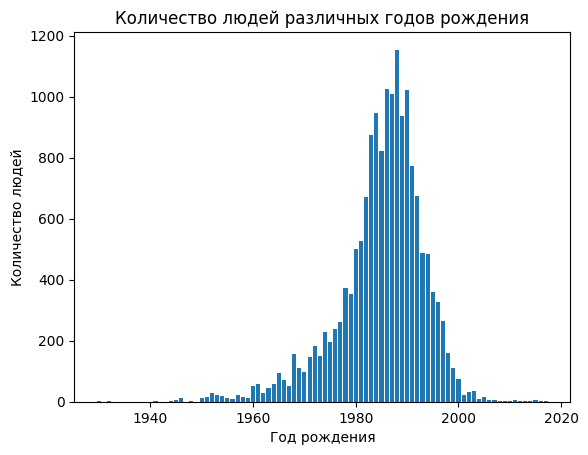

In [30]:
x = year_unq
y = year_cnt_unq

plt.bar(x, y) 
plt.xlabel('Год рождения')
plt.ylabel('Количество людей')
plt.title('Количество людей различных годов рождения')
plt.show()

Как мы видим, график симметричен и с совсем небольшим количеством выбросов. В связи с этим для определения года рождения "типичного" участника будем использовать моду, так как это и будет наиболее встречаемый год рождения участников.

In [17]:
df['Год рождения'].value_counts()

Год рождения
1988    1154
1986    1024
1990    1022
1987    1010
1984     948
        ... 
1944       1
1930       1
2014       1
1932       1
2010       1
Name: count, Length: 75, dtype: int64

Год рождения "типичного" участника - 1988

Теперь определим город

In [19]:
df['Город проживания'].unique()

array(['Москва', 'Новосибирск', 'Cанкт-Петербург', 'Долгопрудный',
       'Екатеринбург', 'Санкт-Петербург', 'Электросталь',
       'Петропавловск-Камчатский', 'Шевлягино', 'Тольятти', 'Вильнюс',
       'москва', 'Moscow', 'Раменское', 'Коломна', 'г. Тверь', 'Таллин',
       'Троицк', 'Клявлино', 'Тверь', 'Лабытнанги', 'Обнинск',
       'Лыткарино', 'Черноголовка', 'Сталинград', 'Рязань', 'Пушкино',
       'Подольск', 'Зюзино', 'село Шеметово (Сергиев Посад)',
       'г.Владимир', 'Железнодорожный', 'Ульяновская область', 'Люберцы',
       'Пущино', 'Озеры', 'Молоково-Нальчик', 'Стерлитамак', 'Зеленоград',
       'Химки', 'Салехард', 'Волгоград/Москва', 'Балашиха', 'Электроугли',
       'П-Посад', 'Жел-дор', 'Калуга', 'Фрязино', 'Дубна', 'Липа',
       'Измайлово', 'Ясногорск', 'Город', 'Анапа', 'Дзержинск', 'Королёв',
       'город-герой Москва', 'мск', 'Красное', 'балашиха', 'Красногорск',
       'Сходня', 'Майкоп', 'Омск', 'село Сафарино', 'Звенигород',
       'Мытищи', 'Цахкадзор',

Заметим, что в данных довольно много ошибочных данных, например, начало с маленькой буквы, данные не относящиеся к городу, записанные на английском языке, сокращения и тд. Попробуем избавится от них

In [147]:
df['Город проживания'] = df['Город проживания'].apply(lambda x: x.capitalize())

In [132]:
df['Город проживания'].value_counts()

Город проживания
Москва             9469
Екатеринбург       1435
Cанкт-петербург    1433
Зеленоград          170
Долгопрудный        159
                   ... 
Жуковский             1
Солнечногорск         1
Орехово-зеуво         1
Copenhagen            1
Мо, лыткарино         1
Name: count, Length: 363, dtype: int64

In [148]:
city_cnt = df['Город проживания'].value_counts()
city_cnt

Город проживания
Москва             9469
Екатеринбург       1435
Cанкт-петербург    1433
Зеленоград          170
Долгопрудный        159
                   ... 
Жуковский             1
Солнечногорск         1
Орехово-зеуво         1
Copenhagen            1
Мо, лыткарино         1
Name: count, Length: 363, dtype: int64

In [149]:
city_unq = df['Город проживания'].unique()
city_unq

array(['Москва', 'Новосибирск', 'Cанкт-петербург', 'Долгопрудный',
       'Екатеринбург', 'Санкт-петербург', 'Электросталь',
       'Петропавловск-камчатский', 'Шевлягино', 'Тольятти', 'Вильнюс',
       'Moscow', 'Раменское', 'Коломна', 'Г. тверь', 'Таллин', 'Троицк',
       'Клявлино', 'Тверь', 'Лабытнанги', 'Обнинск', 'Лыткарино',
       'Черноголовка', 'Сталинград', 'Рязань', 'Пушкино', 'Подольск',
       'Зюзино', 'Село шеметово (сергиев посад)', 'Г.владимир',
       'Железнодорожный', 'Ульяновская область', 'Люберцы', 'Пущино',
       'Озеры', 'Молоково-нальчик', 'Стерлитамак', 'Зеленоград', 'Химки',
       'Салехард', 'Волгоград/москва', 'Балашиха', 'Электроугли',
       'П-посад', 'Жел-дор', 'Калуга', 'Фрязино', 'Дубна', 'Липа',
       'Измайлово', 'Ясногорск', 'Город', 'Анапа', 'Дзержинск', 'Королёв',
       'Город-герой москва', 'Мск', 'Красное', 'Красногорск', 'Сходня',
       'Майкоп', 'Омск', 'Село сафарино', 'Звенигород', 'Мытищи',
       'Цахкадзор', 'Переделкино', 'Дмитр

In [150]:
city_cnt_unq = []
for x in city_unq:
    city_cnt_unq.append(city_cnt[x])
city_cnt_unq

[9469,
 11,
 1433,
 159,
 1435,
 58,
 54,
 12,
 22,
 11,
 6,
 67,
 45,
 18,
 1,
 20,
 21,
 8,
 66,
 24,
 64,
 50,
 46,
 1,
 124,
 58,
 95,
 3,
 9,
 10,
 82,
 10,
 106,
 29,
 3,
 3,
 10,
 170,
 84,
 143,
 5,
 81,
 15,
 6,
 9,
 40,
 30,
 57,
 2,
 4,
 10,
 14,
 1,
 13,
 80,
 4,
 32,
 1,
 81,
 10,
 7,
 1,
 9,
 2,
 88,
 8,
 10,
 1,
 15,
 38,
 17,
 15,
 5,
 34,
 10,
 64,
 3,
 11,
 22,
 6,
 67,
 6,
 6,
 6,
 2,
 20,
 6,
 5,
 55,
 18,
 2,
 32,
 9,
 3,
 15,
 12,
 9,
 13,
 23,
 1,
 9,
 7,
 27,
 2,
 83,
 8,
 5,
 2,
 1,
 2,
 10,
 1,
 7,
 10,
 67,
 18,
 31,
 4,
 7,
 26,
 2,
 10,
 3,
 10,
 5,
 6,
 6,
 10,
 10,
 2,
 5,
 6,
 8,
 10,
 10,
 1,
 31,
 17,
 1,
 1,
 11,
 11,
 1,
 2,
 2,
 1,
 1,
 18,
 8,
 18,
 1,
 16,
 3,
 9,
 7,
 3,
 5,
 1,
 1,
 8,
 9,
 3,
 15,
 7,
 6,
 2,
 10,
 8,
 9,
 3,
 7,
 4,
 8,
 6,
 2,
 2,
 1,
 3,
 7,
 7,
 2,
 2,
 8,
 2,
 8,
 4,
 1,
 1,
 3,
 11,
 7,
 4,
 3,
 9,
 4,
 1,
 1,
 5,
 17,
 7,
 4,
 8,
 6,
 4,
 1,
 8,
 1,
 1,
 2,
 8,
 2,
 1,
 1,
 2,
 1,
 3,
 25,
 5,
 8,
 2,
 1,
 1,
 6,
 5,
 3,

In [151]:
ser = pd.Series(city_cnt, index=city_unq)
ser

Москва                                  9469
Новосибирск                               11
Cанкт-петербург                         1433
Долгопрудный                             159
Екатеринбург                            1435
                                        ... 
Самара                                     1
Бронницы, московская область, россия       1
Auckland, new zealand                      1
Российская федерация, москва               1
Мо, лыткарино                              1
Name: count, Length: 363, dtype: int64

In [138]:
ser = ser.sort_values(ascending=False)
ser

Москва             9469
Екатеринбург       1435
Cанкт-петербург    1433
Зеленоград          170
Долгопрудный        159
                   ... 
Жуковский             1
Солнечногорск         1
Орехово-зеуво         1
Copenhagen            1
Мо, лыткарино         1
Name: count, Length: 363, dtype: int64

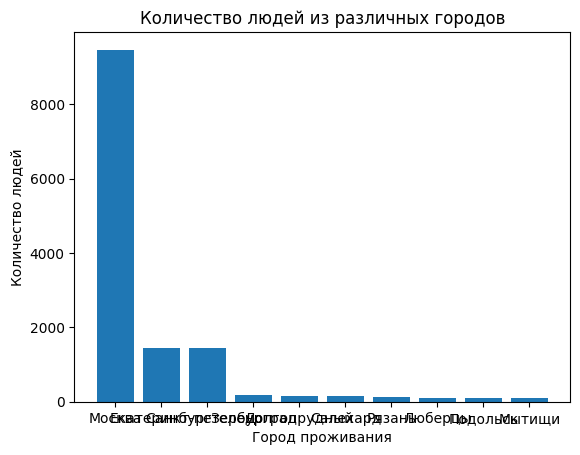

In [38]:
x = ser.index
y = ser.values

plt.bar(x[:10:], y[:10:]) 
plt.xlabel('Город проживания')
plt.ylabel('Количество людей')
plt.title('Количество людей из различных городов')
plt.show()

Как мы видим по гистограмме, аболютное большинство людей из трех городов, а именно: Москвы, Екатеринбурга и Cанкт-петербурга. Москва отрывается слишком сильно, Сантк-Петерубрг или Екатеринбург не догонят её в любом случае, а остальыне города слишком малы в сравнениее с Санкт-Петербургом и Екатеринбургом, поэтому они никак не сыграют никакой роли. Исходя из этого займемся целенаправленной чисткой данных именно по этим двум городам: Санкт-Петербург и Екатеринбург.

In [152]:
len(df['Город проживания'].unique())

363

In [154]:
def repair(city):
    problems = ['Cанкт-петербург', 'Санкт-петербург', 'Ленинград', 'Спб', 'St. petersburg', 'Петербург']
    if city in problems:
        return "Cанкт-петербург"
    else:
        return city

df['Город проживания'] = df['Город проживания'].apply(lambda x: repair(x))

In [155]:
cur = df['Город проживания'].value_counts().head(25)

In [156]:
len(df['Город проживания'].unique())

358

In [157]:
cur

Город проживания
Москва             9469
Cанкт-петербург    1498
Екатеринбург       1435
Зеленоград          170
Долгопрудный        159
Салехард            143
Рязань              124
Люберцы             106
Подольск             95
Мытищи               88
Химки                84
Одинцово             83
Железнодорожный      82
Красногорск          81
Балашиха             81
Королёв              80
Воронеж              67
Королев              67
Moscow               67
Тверь                66
Обнинск              64
Жуковский            64
Пушкино              58
Дубна                57
Тула                 55
Name: count, dtype: int64

In [158]:
len(df['Город проживания'].unique())

358

Теперь, когда все данные по этим городам приведены в нормальное состояние, мы можем сравить их.

Мода по городам - Москва. Причем заметим, что Москва составляет более 57% от общего количества участников, следовательно больше Москвы набрать невозможно. Также как и в случае с годом рождения, мода и определит "типичного" участника. "Типичный" участник из Москвы

Определим пол "типичного" участника:

In [159]:
df['Пол'].value_counts()

Пол
М    12121
Ж     4384
Name: count, dtype: int64

Так как этот столбец бинарный, то можно использовать только моду, тогда:

In [160]:
print(f'{12121/16505*100}%')

73.43835201454105%


Мужчины составляют более 73% от всех участников, следовательно "типичный" участник - мужчина

Тогда "типичный" участник это - мужчина, 1988 года рождения, из Москвы

Пункт 6

Воспользуемся ранее проделанными действиями и расчетами:

In [161]:
cur = df['Город проживания'].value_counts().head(10)
cur

Город проживания
Москва             9469
Cанкт-петербург    1498
Екатеринбург       1435
Зеленоград          170
Долгопрудный        159
Салехард            143
Рязань              124
Люберцы             106
Подольск             95
Мытищи               88
Name: count, dtype: int64

Ответ: Москва, Санкт-Петербург, Екатеринбург

Пункт 5

In [197]:
df_top = df[df["Место команды участника"] <= 100]
df_top

,Соревнование,Год проведения,ID участника,Место команды участника,Пол,Год рождения,Город проживания
1,2014 весна,2014,2,17,М,1987,Москва
6,2014 весна,2014,7,27,М,1988,Долгопрудный
11,2014 весна,2014,12,61,М,1986,Cанкт-петербург
12,2014 весна,2014,13,84,Ж,1976,Москва
57,2014 весна,2014,58,97,М,1984,Cанкт-петербург
...,...,...,...,...,...,...,...
16492,2018 осень,2018,16493,22,М,1983,Воронеж
16493,2018 осень,2018,16494,58,М,1982,Салехард
16494,2018 осень,2018,16495,58,Ж,1981,Красногорск
16499,2018 осень,2018,16500,35,М,1979,Cанкт-петербург


In [198]:
df_top.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1448 entries, 1 to 16500
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Соревнование             1448 non-null   object
 1   Год проведения           1448 non-null   int64 
 2   ID участника             1448 non-null   int64 
 3   Место команды участника  1448 non-null   int64 
 4   Пол                      1448 non-null   object
 5   Год рождения             1448 non-null   int64 
 6   Город проживания         1448 non-null   object
dtypes: int64(4), object(3)
memory usage: 90.5+ KB


In [199]:
len(df_top[df_top.notnull()]) == len(df_top)

True

Пустых ячеек у нас нет

In [200]:
year_cnt_top = df_top['Год рождения'].value_counts()
year_cnt_top

Год рождения
1984    150
1988    119
1983    104
1985     94
1981     91
1987     89
1990     86
1989     85
1982     66
1986     52
1991     41
1979     39
1980     39
1978     34
1974     32
1976     30
1992     28
1971     27
1968     25
1993     25
1977     23
1975     20
1969     20
1965     16
1995     14
1994     13
1972     10
1962     10
1956      9
1963      9
1996      8
1973      6
2000      5
1966      4
1967      4
1952      3
1998      3
1997      2
1953      2
1999      2
1970      2
1951      2
1958      1
1961      1
1954      1
1960      1
1964      1
Name: count, dtype: int64

In [201]:
year_unq_top = df_top['Год рождения'].unique()
year_unq_top

array([1987, 1988, 1986, 1976, 1984, 1974, 1968, 1981, 1969, 1951, 1963,
       1979, 1982, 1990, 1983, 1975, 1985, 1991, 1989, 1980, 1994, 1978,
       1972, 1956, 1971, 1965, 1962, 1952, 1973, 1992, 1966, 2000, 1995,
       1993, 1967, 1977, 1970, 1999, 1953, 1958, 1996, 1961, 1998, 1954,
       1960, 1997, 1964], dtype=int64)

In [202]:
year_cnt_unq_top = []
for x in year_unq_top:
    year_cnt_unq_top.append(year_cnt_top[x])
year_cnt_unq_top

[89,
 119,
 52,
 30,
 150,
 32,
 25,
 91,
 20,
 2,
 9,
 39,
 66,
 86,
 104,
 20,
 94,
 41,
 85,
 39,
 13,
 34,
 10,
 9,
 27,
 16,
 10,
 3,
 6,
 28,
 4,
 5,
 14,
 25,
 4,
 23,
 2,
 2,
 2,
 1,
 8,
 1,
 3,
 1,
 1,
 2,
 1]

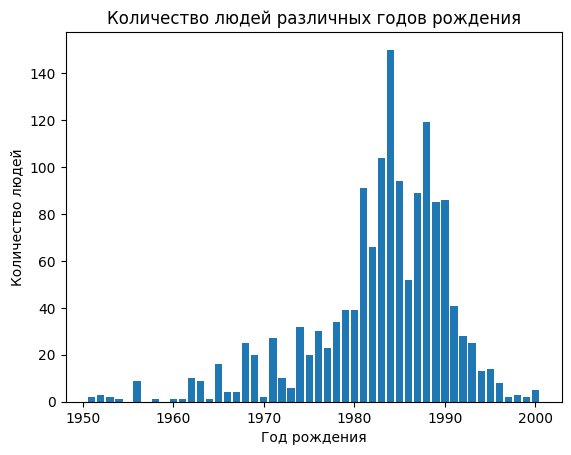

In [204]:
x = year_unq_top
y = year_cnt_unq_top

plt.bar(x, y) 
plt.xlabel('Год рождения')
plt.ylabel('Количество людей')
plt.title('Количество людей различных годов рождения')
plt.show()

График ассимтеричен, имеются не очень хорошие значения, походящие на выбросы, поэтому для определения года рождения "типичного" участника используем моду и медиану, так как они не подвержены выбросам:

In [205]:
ser_top = pd.Series(year_cnt_top, index=year_unq_top)
ser_top

1987     89
1988    119
1986     52
1976     30
1984    150
1974     32
1968     25
1981     91
1969     20
1951      2
1963      9
1979     39
1982     66
1990     86
1983    104
1975     20
1985     94
1991     41
1989     85
1980     39
1994     13
1978     34
1972     10
1956      9
1971     27
1965     16
1962     10
1952      3
1973      6
1992     28
1966      4
2000      5
1995     14
1993     25
1967      4
1977     23
1970      2
1999      2
1953      2
1958      1
1996      8
1961      1
1998      3
1954      1
1960      1
1997      2
1964      1
Name: count, dtype: int64

In [217]:
print(df_top['Год рождения'].mode())
print(df_top['Год рождения'].median())

0    1984
Name: Год рождения, dtype: int64
1984.0


Следовательно год рождения "типичного" участника - 1984

Теперь определим город:

In [218]:
df_top['Город проживания'].unique()

array(['Москва', 'Долгопрудный', 'Cанкт-петербург', 'Таллин',
       'Екатеринбург', 'Троицк', 'Клявлино', 'Обнинск',
       'Село шеметово (сергиев посад)', 'Железнодорожный',
       'Молоково-нальчик', 'Лобня', 'Реутов', 'Подольск', 'Ивантеевка',
       'Смоленск', 'Воронеж', 'Липецк', 'Краснознаменск', 'Салехард',
       'Мытищи', 'Химки', 'Переделкино', 'Петропавловск-камчатский',
       'Пушкино', 'Тверь', 'Люберцы', 'Зеленоград', 'Майкоп', 'Кулебаки',
       'Тула', 'Рязань', 'Moscow', 'Дмитров', 'Красногорск', 'Г.владимир',
       'Чехов', 'Домодедово', 'Цахкадзор', 'Королёв', 'Старая купавна',
       'Село сафарино', 'Водники (долгопрудный)', 'Митино', 'Лыткарино',
       'Сергиев посад', 'Торжок', 'Новосибирск', 'Пос. ильинский',
       'Королев-кулебаки', 'С. пышлицы', 'Нерехта', 'Апрелевка',
       'Тирасполь', 'Трудовая, мо', 'Луховицы', 'Коломна', 'Жуковский',
       'Владивосток', 'Кузяево, мо', 'Нижний новгород', 'Krasnogorsk ',
       'Балашиха', 'Уфа-москва', 'Ногинск'

In [219]:
df_top['Город проживания'].value_counts()

Город проживания
Москва             678
Cанкт-петербург    202
Екатеринбург       165
Салехард            43
Долгопрудный        26
                  ... 
Жуковский            1
Коломна              1
С. пышлицы           1
Тирасполь            1
Электросталь         1
Name: count, Length: 81, dtype: int64

In [220]:
df_top['Город проживания'].count()

1448

Первые 3 года лидеруют с большим отрывом, рассмотрим их:
Из Москвы 47%, из Санкт-Петербурга - 14%, из Екатеринбруга - 11,5%. Но так как у нас остались "плохие" данные, то есть те, которые неправильно написаны, может возникнуть случай, что они все относятся к каким-то городам, тогда худший случай, когда все они относятся ко 2-му по количеству участников городу - Санкт-Петербургу. В таком случае из него будет 14 + (100 - (47+14+11,5)) = 41,5%. Но даже в таком случае из Москвы будет больше участников. 
Следовательно: "типичный" участник из Москвы.

Определим пол:

In [221]:
df_top['Пол'].value_counts()

Пол
М    1217
Ж     231
Name: count, dtype: int64

In [222]:
df_top['Пол'].count()

1448

Мужчины составляют 84% от всех участников, следовательно "типичный" участник - мужчина

Тогда "типичный" участник это - мужчина, 1984 года рождения, из Москвы
